# NN tension prediction for SUPERball 
### &nbsp; &nbsp; &nbsp; Chiara Ercolani


This neural network uses the torque values of the 24 motors of SUPERball as features to predict the tension on one of the cables. The learning process is supervised and data is acquired by logging the motor status for a long period of time. To measure the tension of the cable, another motor was attached to said cable and used as a force sensor.

Dataset used for training: 2017-10-24_BiggerBetterData_1kHz.mat



In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import collections
import os
import collections
import matplotlib.pyplot as plt
import scipy.io

In [2]:
D=24                                          #number of features recorded at each time step 
TRAIN_SET_SIZE=200000                         # Size of training dataset
TEST_SET_SIZE=100000                          # SIze of test dataset

#Importing dataset
dataset=scipy.io.loadmat('2017-10-24_BiggerBetterData_1kHz.mat')
#Selecting subset of the entire dataset that contains the features meaningful for this prediction
dataset_effort=dataset.get('effort')

#Dividing dataset into train and target subsets
train_target=[]
for i in range(0, TRAIN_SET_SIZE):
    train_target.append(dataset_effort[i,D])
train_target=np.asarray(train_target)
train_target=np.reshape(train_target,[len(train_target),1])
print(train_target.shape)

test_target=[]
for i in range(TRAIN_SET_SIZE, TRAIN_SET_SIZE+TEST_SET_SIZE):
    test_target.append(dataset_effort[i,D])
test_target=np.asarray(test_target) 
test_target=np.reshape(test_target,[len(test_target),1])
print(test_target.shape)

train_features=[]
for i in range(0, TRAIN_SET_SIZE):
    train_features.append(dataset_effort[i,0:D])
train_features=np.asarray(train_features)
train_features=np.reshape(train_features,[len(train_features),D])
print(train_features.shape)

test_features=[]
for i in range(TRAIN_SET_SIZE, TRAIN_SET_SIZE+TEST_SET_SIZE):
    test_features.append(dataset_effort[i,0:D])
test_features=np.asarray(test_features)
test_features=np.reshape(test_features,[len(test_features),D])

print(test_features.shape)

(200000, 1)
(100000, 1)
(200000, 24)
(100000, 24)


In [3]:
batch_size = 100                                #size of the batch
batch_len =len(train_features)//batch_size      
                                
H = 5*D                                         # size of hidden state

print('train_data_len=',len(train_features),' batch_size=',batch_size,' batch_len=',
      batch_len,' D=',D,'H=',H)

train_data_len= 200000  batch_size= 100  batch_len= 2000  D= 24 H= 120


In [4]:
# Create placceholders for the models. In the training and test phases real data will be fed to the NN and will take the 
# place of these placeholders

#Input shape: (batch_size,number of features)
#Output shape: (batch_size, number of outputs)
Xin= tf.placeholder(tf.float32,shape=[batch_size,D])
Ytarget = tf.placeholder(tf.float32,shape=[batch_size,1])


#Xavier initialization for weights 
#http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
Wx = tf.get_variable("Wx", shape=[D, H],initializer=tf.contrib.layers.xavier_initializer()); print('Wx=',Wx.get_shape())
Wy = tf.get_variable("Wy", shape=[H, 1],initializer=tf.contrib.layers.xavier_initializer()); print('Wy=',Wy.get_shape())

#Bias initialized to 0
bh = tf.Variable(tf.zeros([1,H])); print('bh=',bh.get_shape())
by = tf.Variable(tf.zeros([1,1])); print('by=',by.get_shape())

Wx= (24, 120)
Wy= (120, 1)
bh= (1, 120)
by= (1, 1)


## NN Implementation

The neural network only has one hidden layer and is using the ReLU function as activation function:

$$
\begin{aligned}
h_t &= \textrm{ReLU}(W_x x_{in} + b_h)\\
y_t &= W_y h_t + b_y
\end{aligned}
$$



In [5]:
# NN implementation with ReLU function and one hidden layer

h_t=tf.nn.relu(tf.matmul(Xin,Wx)+bh)
y_=tf.matmul(h_t,Wy)+ by;

print('Ypredicted=',y_.get_shape())
print('Ytarget=',Ytarget.get_shape())

#Mean Squared Error cost function (worse performance)

#cost = tf.reduce_mean(tf.square(Ytarget-y_))

#Mean Absolute Error cost function

cost=tf.reduce_mean(tf.abs(tf.subtract(y_, Ytarget)))

#Optimizer used to implement backpropagation

optimizer = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(cost)

Ypredicted= (100, 1)
Ytarget= (100, 1)


In [6]:
#Defining an interval for the accuracy
margin=0.1
lower_bound =tf.greater_equal(y_,tf.subtract(Ytarget,margin))
upper_bound= tf.less_equal(y_,tf.add(Ytarget,margin))
correct=tf.equal(lower_bound,upper_bound)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
print('Accuracy interval set')

Accuracy interval set


Epoch: 0, Cost: 0.48478904366493225, Accuracy: 0.0
Epoch: 1, Cost: 0.4659597873687744, Accuracy: 0.0
Epoch: 2, Cost: 0.4530091881752014, Accuracy: 0.0
Epoch: 3, Cost: 0.4329414367675781, Accuracy: 0.0
Epoch: 4, Cost: 0.42022979259490967, Accuracy: 0.0
Epoch: 5, Cost: 0.40162673592567444, Accuracy: 0.0
Epoch: 6, Cost: 0.3913406431674957, Accuracy: 0.0
Epoch: 7, Cost: 0.38412216305732727, Accuracy: 0.0
Epoch: 8, Cost: 0.3784637749195099, Accuracy: 0.0
Epoch: 9, Cost: 0.37223851680755615, Accuracy: 0.0
Epoch: 10, Cost: 0.36692744493484497, Accuracy: 0.0
Epoch: 11, Cost: 0.3646880090236664, Accuracy: 0.0
Epoch: 12, Cost: 0.32021626830101013, Accuracy: 0.0
Epoch: 13, Cost: 0.3103141486644745, Accuracy: 0.0
Epoch: 14, Cost: 0.3072233498096466, Accuracy: 0.0
Epoch: 15, Cost: 0.2985406517982483, Accuracy: 0.0
Epoch: 16, Cost: 0.2941829562187195, Accuracy: 0.0
Epoch: 17, Cost: 0.2888771593570709, Accuracy: 0.0
Epoch: 18, Cost: 0.28273501992225647, Accuracy: 0.0
Epoch: 19, Cost: 0.27856323122978

Epoch: 140, Cost: 0.09914983808994293, Accuracy: 0.5199999809265137
Epoch: 141, Cost: 0.0987151563167572, Accuracy: 0.5299999713897705
Epoch: 142, Cost: 0.09867534041404724, Accuracy: 0.5299999713897705
Epoch: 143, Cost: 0.0974276140332222, Accuracy: 0.550000011920929
Epoch: 144, Cost: 0.09706657379865646, Accuracy: 0.5600000023841858
Epoch: 145, Cost: 0.09505569189786911, Accuracy: 0.6299999952316284
Epoch: 146, Cost: 0.09526076167821884, Accuracy: 0.6200000047683716
Epoch: 147, Cost: 0.09332159161567688, Accuracy: 0.6399999856948853
Epoch: 148, Cost: 0.09107467532157898, Accuracy: 0.6399999856948853
Epoch: 149, Cost: 0.08939150720834732, Accuracy: 0.6499999761581421
Epoch: 150, Cost: 0.08784541487693787, Accuracy: 0.6499999761581421
Epoch: 151, Cost: 0.08681204169988632, Accuracy: 0.6700000166893005
Epoch: 152, Cost: 0.08482740074396133, Accuracy: 0.6700000166893005
Epoch: 153, Cost: 0.0855356752872467, Accuracy: 0.6700000166893005
Epoch: 154, Cost: 0.08173134922981262, Accuracy: 0.6

Epoch: 268, Cost: 0.02471456304192543, Accuracy: 1.0
Epoch: 269, Cost: 0.02449832670390606, Accuracy: 1.0
Epoch: 270, Cost: 0.02382834255695343, Accuracy: 1.0
Epoch: 271, Cost: 0.02397463098168373, Accuracy: 1.0
Epoch: 272, Cost: 0.023723356425762177, Accuracy: 1.0
Epoch: 273, Cost: 0.023440338671207428, Accuracy: 1.0
Epoch: 274, Cost: 0.02329251356422901, Accuracy: 1.0
Epoch: 275, Cost: 0.02311553992331028, Accuracy: 1.0
Epoch: 276, Cost: 0.022847257554531097, Accuracy: 1.0
Epoch: 277, Cost: 0.022723395377397537, Accuracy: 1.0
Epoch: 278, Cost: 0.022943269461393356, Accuracy: 1.0
Epoch: 279, Cost: 0.02280387096107006, Accuracy: 1.0
Epoch: 280, Cost: 0.022716332226991653, Accuracy: 1.0
Epoch: 281, Cost: 0.022858936339616776, Accuracy: 1.0
Epoch: 282, Cost: 0.022853171452879906, Accuracy: 1.0
Epoch: 283, Cost: 0.023013398051261902, Accuracy: 1.0
Epoch: 284, Cost: 0.02326427400112152, Accuracy: 1.0
Epoch: 285, Cost: 0.023275190964341164, Accuracy: 1.0
Epoch: 286, Cost: 0.0234535187482833

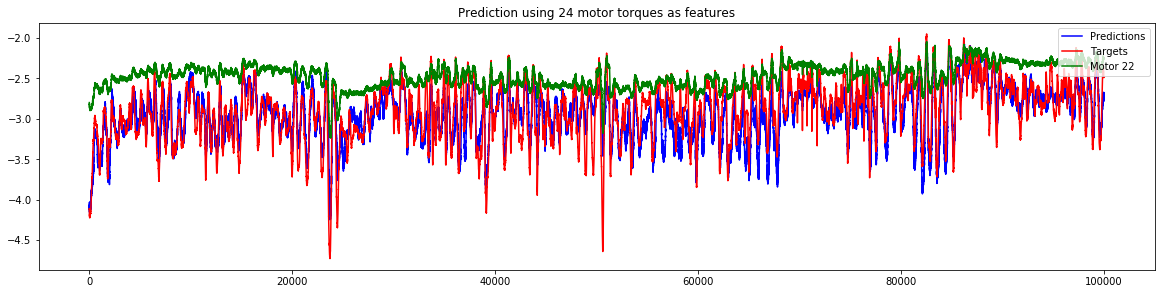

In [7]:
#Initializing the variables and the session
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)
costs = []

# TRAINING
# For every epoch, feed the whole training set in batches and let the NN learn the weights and the biases
for epoch in range(300):   
    total_batch=int(len(train_features)/batch_size)
    for i in range(total_batch):       
        inp_data= train_features[i*batch_size:(i+1)*batch_size,:]
        out_data= train_target[i*batch_size:(i+1)*batch_size,:]
        _,acc,c = sess.run([optimizer,accuracy,cost],feed_dict={Xin: inp_data, Ytarget: out_data})
    print("Epoch: {}, Cost: {}, Accuracy: {}".format(epoch,c,acc))
    costs.append(c)


print ("\nTraining complete!")

#TESTING
#Feed the test set in batches and compare the prediction with the actual output from the output test set
predicted=[]
test_batch=int(len(test_features)/batch_size)
for j in range (test_batch):    
    inp_data = test_features[j*batch_size:(j+1)*batch_size,:]
    pred = sess.run(y_, feed_dict={Xin: inp_data})
    predicted=np.append(predicted,pred)


# Plot predicted values, real output values and measurement from the motor connected to the cable whose tension 
# we are trying to predict
x=np.arange(0,len(test_target))
y1= predicted
y2= test_target
y3=-test_features[:,21]*0.0175/0.008

fig= plt.figure(figsize=(20,10))
ax1=plt.subplot(211)
ax1.plot(x,y1,'b',label='Predictions')
ax1.plot(x,y2,'r',label='Targets')
ax1.plot(x,y3,'g',label='Motor 22')
ax1.legend(loc="upper right")

plt.title('Prediction using 24 motor torques as features')

plt.show()

sess.close()